# Machine Learning: Clustering Methods

For this project, different clustering methods will be explored and practiced using various datasets.

### K-Means Clustering

For this section of the project, two separate datasets will be used - a randomly generated data set and a customer segmentation dataset. 

In [1]:
#Importing the necessary libraries
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

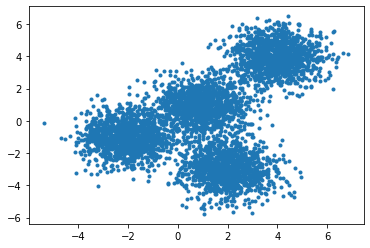

In [2]:
#Generate a random set of data for clustering
np.random.seed(0)
X, y = make_blobs(n_samples = 5000, centers = [[4, 4], [-2, -1], [2, -3], [1, 1]], cluster_std = 0.9)
plt.scatter(X[:, 0], X[:, 1], marker = '.')

In [3]:
#Initializing KMeans
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [4]:
#Fitting the KMeans model with X
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [5]:
#Obtaining the labels for each point in the model
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0], dtype=int32)

In [6]:
#Obtaining the coordinates of the cluster centers
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

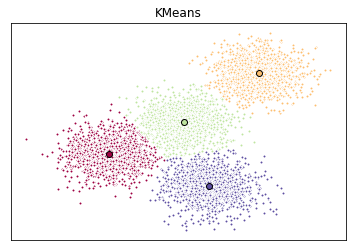

In [7]:
#Creating a visual plot for the kmeans model
fig = plt.figure(figsize = (6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len([[4, 4], [-2, -1], [2, -3], [1, 1]])), colors):
    my_members = (k_means_labels == k)
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], "w", markerfacecolor = col, marker = ".")
    ax.plot(cluster_center[0], cluster_center[1], "o", markerfacecolor = col,  markeredgecolor = "k", markersize=6)

ax.set_title("KMeans")
ax.set_xticks(())
ax.set_yticks(())
plt.show()

Second part of this section introduces a second dataset.

In [8]:
#Loading customer segmentation data
#Importing pandas
import pandas as pd

#Retrieving data from url and storing it in a dataframe
!wget -O Cust_Segmentation.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

--2020-07-21 18:22:30--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34276 (33K) [text/csv]
Saving to: ‘Cust_Segmentation.csv’

Cust_Segmentation.c 100%[===================>]  33.47K  --.-KB/s    in 0.02s   

2020-07-21 18:22:30 (1.71 MB/s) - ‘Cust_Segmentation.csv’ saved [34276/34276]



,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [9]:
#Preprocessing of the data frame
df = cust_df.drop("Address", axis = 1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [10]:
#Using StandardScaler() to normalize the data
#Importing the necessary package
from sklearn.preprocessing import StandardScaler
X = df.values[:, 1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [11]:
#Applying k means and displaying clustering labels
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
labels

array([1, 2, 1, 1, 0, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0,
       1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1,
       2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2,
       0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1,
       2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,

In [12]:
#Assigning labels to each row of the dataframe
df["Clus_km"] = labels
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,0


In [13]:
#Checking centroid values by averaging the features in each cluster
df.groupby("Clus_km").mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
1,432.006154,32.967692,1.613846,6.389231,31.204615,1.032711,2.108345,0.284658,10.095385
2,403.780220,41.368132,1.961538,15.252747,84.076923,3.114412,5.770352,0.172414,10.725824


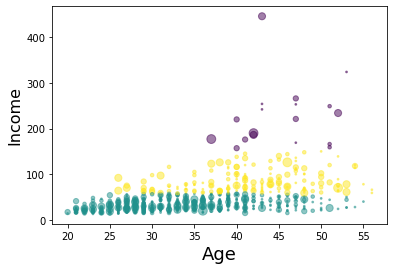

In [14]:
#Visual distribution of customers based on age and income
area = np.pi * (X[: ,1]) ** 2
plt.scatter(X[:, 0], X[:, 3], s = area, c = labels.astype(np.float), alpha = 0.5)
plt.xlabel("Age", fontsize = 18)
plt.ylabel("Income", fontsize = 16)

plt.show()

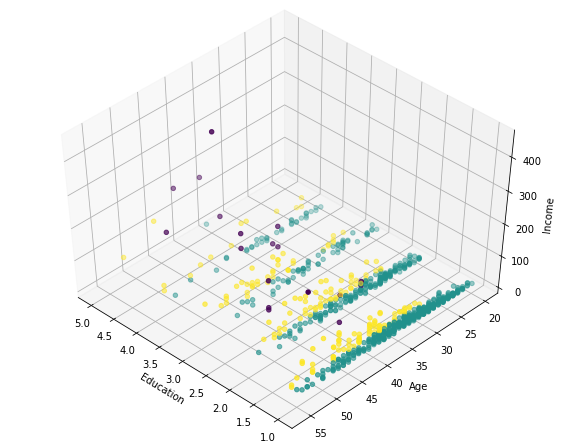

In [15]:
#Importing Axes3D
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize = (8, 6))
plt.clf()
ax = Axes3D(fig, rect = [0, 0 , 0.95, 1], elev = 48, azim = 134)
plt.cla()

ax.set_xlabel("Education")
ax.set_ylabel("Age")
ax.set_zlabel("Income")

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c = labels.astype(np.float))

### Agglomerative Hierarchical Clustering

In [16]:
#Importing the necessary packages for the section
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 

Similar to the previous section, two dataset will be used in this section. One is randomly generated while the other is a vehicle related dataset.

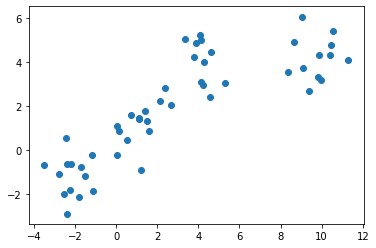

In [17]:
#Generating a random set of data and plotting it
X1, y1 = make_blobs(n_samples = 50, centers=[[4, 4], [-2, -1], [1, 1], [10,4]], cluster_std = 0.9)
plt.scatter(X1[:, 0], X1[:, 1], marker = "o")

In [18]:
#Generate agglomerative clustering model with average linkage and storing in the variable agglom
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

#Fitting the model with X1 and y1
agglom.fit(X1, y1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=4, pooling_func='deprecated')

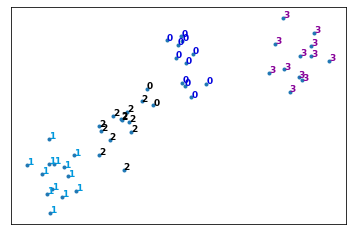

In [19]:
#Plotting the model
plt.figure(figsize = (6, 4))
x_min, x_max = np.min(X1, axis = 0), np.max(X1, axis = 0)
X1 = (X1 - x_min) / (x_max - x_min)

for i in range (X1.shape[0]):
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]), color = plt.cm.nipy_spectral(agglom.labels_[i] / 10.), fontdict = {"weight" : "bold", "size" : 9})

plt.xticks([])
plt.yticks([])

plt.scatter(X1[:, 0], X1[:, 1], marker = ".")
plt.show()

In [20]:
#Generating distance matrix for the agglomerative model
dist_matrix = distance_matrix(X1, X1)
print(dist_matrix)

[[0.         1.13392448 0.38594172 ... 0.19815117 1.12264841 1.00572024]
 [1.13392448 0.         0.74822647 ... 1.12688364 0.09597395 0.13144897]
 [0.38594172 0.74822647 0.         ... 0.40627563 0.74047226 0.6197794 ]
 ...
 [0.19815117 1.12688364 0.40627563 ... 0.         1.13244444 0.99552097]
 [1.12264841 0.09597395 0.74047226 ... 1.13244444 0.         0.16655268]
 [1.00572024 0.13144897 0.6197794  ... 0.99552097 0.16655268 0.        ]]


In [21]:
Z = hierarchy.linkage(dist_matrix, "average")

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


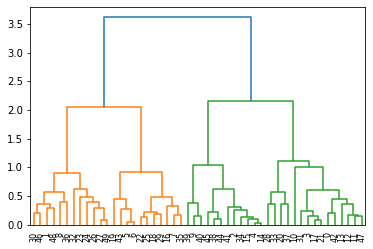

In [22]:
#Generating dendrogram and saving it in variable dendro
dendro = hierarchy.dendrogram(Z)

For the second part of this section, an automobile model dataset will be used for agglomerative clustering.

In [23]:
#Importing the data
!wget -O cars_clus.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv

--2020-07-21 18:22:34--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17774 (17K) [text/csv]
Saving to: ‘cars_clus.csv’

cars_clus.csv       100%[===================>]  17.36K  --.-KB/s    in 0.02s   

2020-07-21 18:22:34 (956 KB/s) - ‘cars_clus.csv’ saved [17774/17774]



In [24]:
#Storing the data in a dataframe
file_name = "cars_clus.csv"
pdf = pd.read_csv(file_name)
pdf.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [25]:
#Preprocessing of the data
pdf[["sales", "resale", "type", "price", "engine_s", "horsepow", 
    "wheelbas", "width", "length", "curb_wgt", "fuel_cap", 
     "mpg", "lnsales"]] = pdf [["sales", "resale", "type", "price", "engine_s", 
    "horsepow", "wheelbas", "width", "length", "curb_wgt", "fuel_cap", "mpg",
    "lnsales"]].apply(pd.to_numeric, errors = "coerce")

pdf = pdf.dropna()
pdf = pdf.reset_index(drop =True)
pdf.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


In [26]:
#Selecting feature set
featureset = pdf[["engine_s", "horsepow", "wheelbas", "width", "length", "curb_wgt", "fuel_cap", "mpg"]]

In [27]:
#Normalizing the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
x = featureset.values
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx[0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

In [28]:
#Clustering using scipy
#Importing scipy
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng, leng])
for i in range(leng):
    for j in range(leng):
        D[i, j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  """


In [29]:
#Clustering using scikit-learn
#Generating distance matrix
dist_matrix = distance_matrix(feature_mtx, feature_mtx)

In [30]:
#Generating agglomerative clustering model with complete linkage
agglom = AgglomerativeClustering(n_clusters = 6, linkage = "complete")
agglom.fit(feature_mtx)
#Displaying agglomerative clustering labels
agglom.labels_

array([1, 2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 2, 3, 3, 2, 1, 1, 2, 2, 2, 5, 1,
       4, 1, 1, 2, 1, 2, 1, 1, 1, 5, 0, 0, 0, 3, 2, 1, 2, 1, 2, 3, 2, 3,
       0, 3, 0, 1, 1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 2, 3, 2, 3, 1, 2, 3, 5, 1, 1, 2, 3, 2, 1, 3,
       2, 3, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 0, 1, 1, 1, 1, 1])

In [31]:
#Adding a new field to the dataframe to show the cluster of each row
pdf["cluster_"] = agglom.labels_
pdf.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,1
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,2
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,2
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,1
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,2


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Text(0, 0.5, 'mpg')

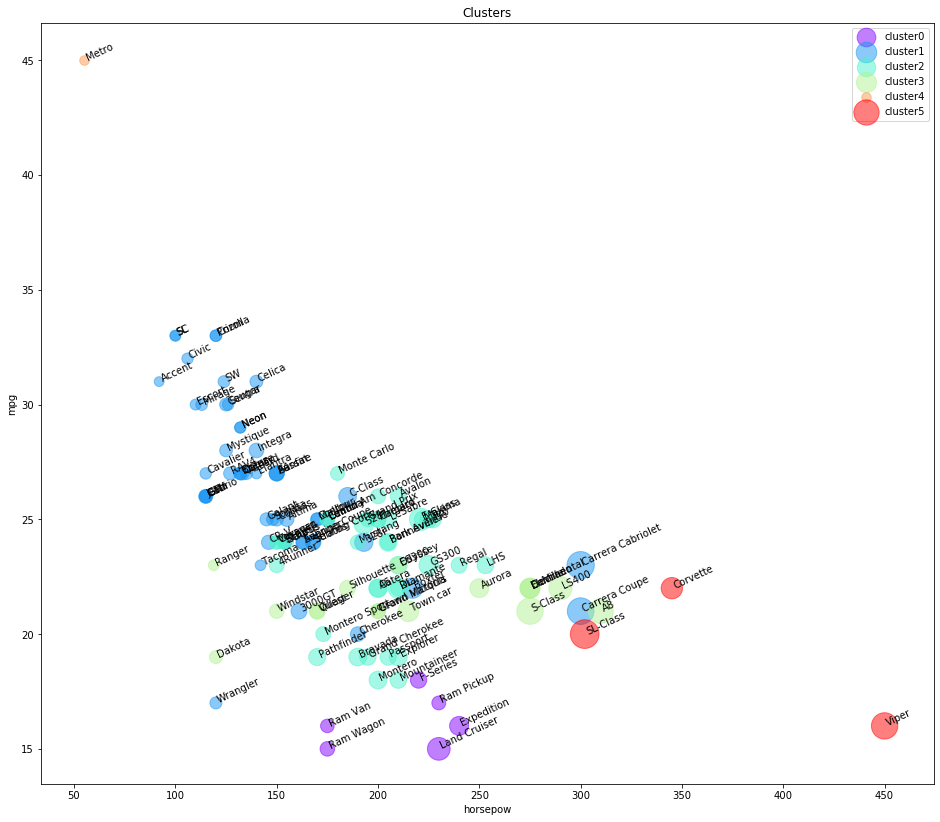

In [32]:
#Plotting the clusters
import matplotlib.cm as cm
n_clusters = max(agglom.labels_) + 1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

plt.figure(figsize = (16, 14))

for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf.cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i], str(subset["model"][i]), rotation = 25) 
    plt.scatter(subset.horsepow, subset.mpg, s = subset.price * 10, c = color, label = "cluster" + str(label), alpha = 0.5)

plt.legend()
plt.title("Clusters")
plt.xlabel("horsepow")
plt.ylabel("mpg")

In [33]:
pdf.groupby(["cluster_", "type"])["cluster_"].count()

cluster_  type
0         1.0      6
1         0.0     47
          1.0      5
2         0.0     27
          1.0     11
3         0.0     10
          1.0      7
4         0.0      1
5         0.0      3
Name: cluster_, dtype: int64

In [34]:
agg_cars = pdf.groupby(["cluster_", "type"])["horsepow", "engine_s", "mpg", "price"].mean()
agg_cars

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


horsepow  engine_s        mpg      price
cluster_ type                                            
0        1.0   211.666667  4.483333  16.166667  29.024667
1        0.0   146.531915  2.246809  27.021277  20.306128
         1.0   145.000000  2.580000  22.200000  17.009200
2        0.0   203.111111  3.303704  24.214815  27.750593
         1.0   182.090909  3.345455  20.181818  26.265364
3        0.0   256.500000  4.410000  21.500000  42.870400
         1.0   160.571429  3.071429  21.428571  21.527714
4        0.0    55.000000  1.000000  45.000000   9.235000
5        0.0   365.666667  6.233333  19.333333  66.010000

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Text(0, 0.5, 'mpg')

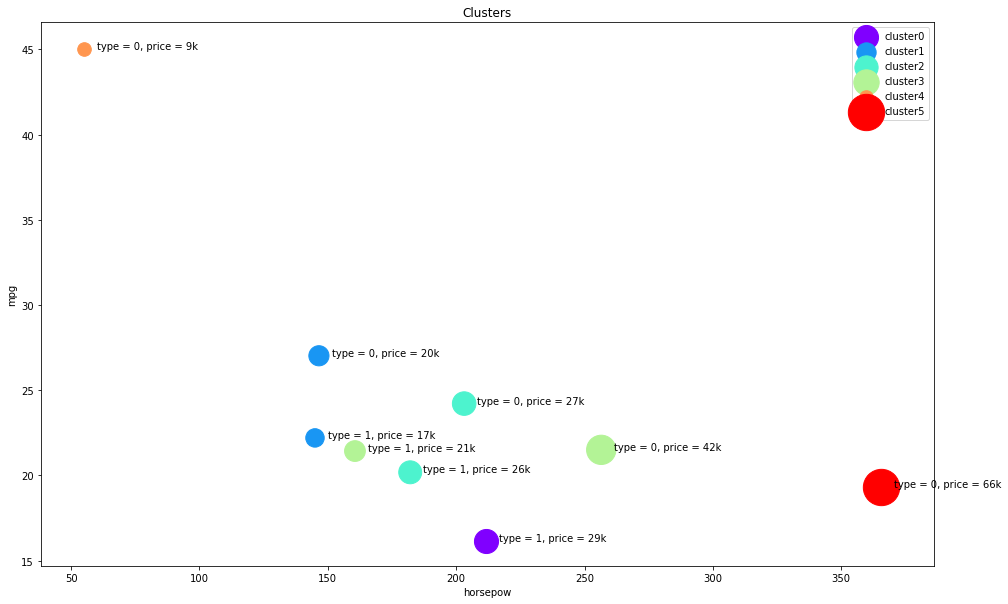

In [35]:
plt.figure(figsize = (16, 10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0] + 5, subset.loc[i][2], "type = " + str(int(i)) + ", price = " + str(int(subset.loc[i][3])) + "k")
    plt.scatter(subset.horsepow, subset.mpg, s = subset.price * 20, c = color, label = "cluster" + str(label))

plt.legend()
plt.title("Clusters")
plt.xlabel("horsepow")
plt.ylabel("mpg")

### DBSCAN Clustering

In [36]:
#Function that generates the data points needed for this section
def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    # Create random data and store in feature matrix X and response vector y.
    X, y = make_blobs(n_samples = numSamples, centers = centroidLocation, 
                                cluster_std = clusterDeviation)
    
    # Standardize features by removing the mean and scaling to unit variance
    X = StandardScaler().fit_transform(X)
    return X, y

In [37]:
#Generating the data
X, y = createDataPoints([[4, 3], [2, -1], [-1, 4]] , 1500, 0.5)

In [39]:
#DBSCAN model and label
from sklearn.cluster import DBSCAN
epsilon = 0.3
minSamples = 7
db = DBSCAN(eps = epsilon, min_samples = minSamples).fit(X)
labels = db.labels_
labels

array([0, 1, 0, ..., 1, 0, 0])

In [40]:
#Distinguishing outliers 
#Creating arrat of booleans using the db labels
core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
core_samples_mask[db.core_sample_indices_] = True

In [41]:
#Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [42]:
#removing repetition in labels by turning it into a set
unique_labels = set(labels)

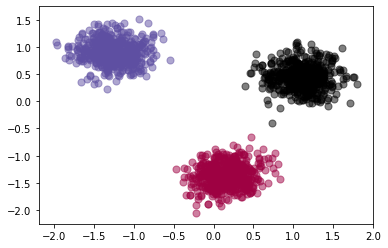

In [43]:
#Model visualizations
#Creating colors for each clusters
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

#Plotting the data
for k, col in zip(unique_labels, colors):
    if k == 1:
        col = "k"
    class_member_mask = (labels == k)
   
    #Plotting clustered points
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s = 50, c = [col], marker = u"o", alpha = 0.5)
    
    #Plotting outliers
    xy = X[class_member_mask &~ core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s = 50, c = [col], marker = u"o", alpha = 0.5)